In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-rc1


In [2]:
raw_dataset = pd.read_csv("/home/smsung/Downloads/MilliCar-SUMO/Test/Test_data_220120/alldata.txt",sep='\t', names=['seq','speed','IR','Pathloss','dist','Attenuation','Weather','Scenario','intensity','k','a','los','WC2'])
dataset = raw_dataset.copy()
# dataset.tail()
dataset

,seq,speed,IR,Pathloss,dist,Attenuation,Weather,Scenario,intensity,k,a,los,WC2
0,0.0,60,0,133.980,1457.01,0.0000,1,V2V-Highway,0.0,0.0000,0.0000,los,sunny
1,0.1,60,0,136.677,1455.34,0.0000,1,V2V-Highway,0.0,0.0000,0.0000,los,sunny
2,0.2,60,0,128.739,1453.68,0.0000,1,V2V-Highway,0.0,0.0000,0.0000,los,sunny
3,0.3,60,0,134.745,1452.01,0.0000,1,V2V-Highway,0.0,0.0000,0.0000,los,sunny
4,0.4,60,0,134.735,1450.35,0.0000,1,V2V-Highway,0.0,0.0000,0.0000,los,sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,79.5,60,30,124.961,1227.81,22.0986,3,V2V-Urban,30.0,0.8606,0.7656,nlos-v,snow-rain
23996,79.6,60,30,124.985,1229.48,22.1138,3,V2V-Urban,30.0,0.8606,0.7656,nlos-v,snow-rain
23997,79.7,60,30,126.000,1231.14,22.1290,3,V2V-Urban,30.0,0.8606,0.7656,nlos-v,snow-rain
23998,79.8,60,30,124.982,1232.81,22.1441,3,V2V-Urban,30.0,0.8606,0.7656,nlos-v,snow-rain


In [3]:
dataset.isna().sum()

seq            0
speed          0
IR             0
Pathloss       0
dist           0
Attenuation    0
Weather        0
Scenario       0
intensity      0
k              0
a              0
los            0
WC2            0
dtype: int64

In [4]:
dataset = dataset.dropna()

In [5]:
origin = dataset.pop('WC2')
# origin = dataset.pop('seq')
origin = dataset.pop('IR')
origin = dataset.pop('speed')
origin = dataset.pop('Scenario')

In [6]:
dataset['V2V-Urban'] = (origin == 'V2V-Urban')*1.0
dataset['V2V-Highway'] = (origin == 'V2V-Highway')*1.0
# dataset.tail()
dataset

,seq,Pathloss,dist,Attenuation,Weather,intensity,k,a,los,V2V-Urban,V2V-Highway
0,0.0,133.980,1457.01,0.0000,1,0.0,0.0000,0.0000,los,0.0,1.0
1,0.1,136.677,1455.34,0.0000,1,0.0,0.0000,0.0000,los,0.0,1.0
2,0.2,128.739,1453.68,0.0000,1,0.0,0.0000,0.0000,los,0.0,1.0
3,0.3,134.745,1452.01,0.0000,1,0.0,0.0000,0.0000,los,0.0,1.0
4,0.4,134.735,1450.35,0.0000,1,0.0,0.0000,0.0000,los,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
23995,79.5,124.961,1227.81,22.0986,3,30.0,0.8606,0.7656,nlos-v,1.0,0.0
23996,79.6,124.985,1229.48,22.1138,3,30.0,0.8606,0.7656,nlos-v,1.0,0.0
23997,79.7,126.000,1231.14,22.1290,3,30.0,0.8606,0.7656,nlos-v,1.0,0.0
23998,79.8,124.982,1232.81,22.1441,3,30.0,0.8606,0.7656,nlos-v,1.0,0.0


In [7]:
origin = dataset.pop('los')
dataset['los'] = (origin == 'los')*1.0
dataset['nlos'] = (origin == 'nlos')*1.0
dataset['nlos-v'] = (origin == 'nlos-v')*1.0
# dataset.tail()
dataset

,seq,Pathloss,dist,Attenuation,Weather,intensity,k,a,V2V-Urban,V2V-Highway,los,nlos,nlos-v
0,0.0,133.980,1457.01,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
1,0.1,136.677,1455.34,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
2,0.2,128.739,1453.68,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
3,0.3,134.745,1452.01,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
4,0.4,134.735,1450.35,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,79.5,124.961,1227.81,22.0986,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23996,79.6,124.985,1229.48,22.1138,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23997,79.7,126.000,1231.14,22.1290,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23998,79.8,124.982,1232.81,22.1441,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0


In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
dataset

,seq,Pathloss,dist,Attenuation,Weather,intensity,k,a,V2V-Urban,V2V-Highway,los,nlos,nlos-v
0,0.0,133.980,1457.01,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
1,0.1,136.677,1455.34,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
2,0.2,128.739,1453.68,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
3,0.3,134.745,1452.01,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
4,0.4,134.735,1450.35,0.0000,1,0.0,0.0000,0.0000,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,79.5,124.961,1227.81,22.0986,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23996,79.6,124.985,1229.48,22.1138,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23997,79.7,126.000,1231.14,22.1290,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0
23998,79.8,124.982,1232.81,22.1441,3,30.0,0.8606,0.7656,1.0,0.0,0.0,0.0,1.0


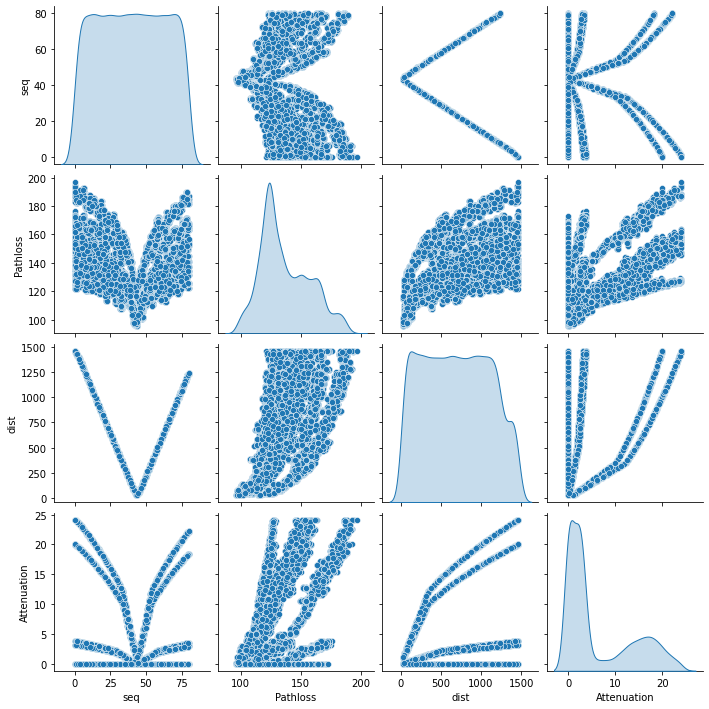

In [9]:
sns.pairplot(train_dataset[["seq","Pathloss","dist","Attenuation"]], diag_kind="kde")
# ,"WC","i","k","a","los","nlos","nlos-v","V2V-Urban","V2V-Highway"

In [10]:
train_stats = train_dataset.describe()
train_stats.pop("Pathloss")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
seq,19200.0,39.921208,23.093233,0.0000,20.000000,39.95000,59.9000,79.9000
dist,19200.0,690.828399,402.299353,31.6395,342.306000,684.25200,1026.0200,1457.0100
Attenuation,19200.0,6.433028,7.252770,0.0000,0.729098,2.72721,13.1123,24.1200
Weather,19200.0,2.204063,0.747462,1.0000,2.000000,2.00000,3.0000,3.0000
intensity,19200.0,12.976042,13.900113,0.0000,2.500000,2.50000,30.0000,30.0000
k,19200.0,0.690094,0.343033,0.0000,0.860600,0.86060,0.8606,0.8606
a,19200.0,0.613915,0.305166,0.0000,0.765600,0.76560,0.7656,0.7656
V2V-Urban,19200.0,0.499323,0.500013,0.0000,0.000000,0.00000,1.0000,1.0000
V2V-Highway,19200.0,0.500677,0.500013,0.0000,0.000000,1.00000,1.0000,1.0000
los,19200.0,0.333437,0.471454,0.0000,0.000000,0.00000,1.0000,1.0000


In [11]:
train_labels = train_dataset.pop('Pathloss')
test_labels = test_dataset.pop('Pathloss')

In [12]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(48, activation='relu'),
    layers.Dense(32, activation='relu'),                        
    layers.Dense(16, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [14]:
model = build_model()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                1584      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [16]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01438185],
       [-0.00949516],
       [-0.00840773],
       [ 0.08402601],
       [-0.00058441],
       [-0.00285639],
       [ 0.01660149],
       [ 0.00773578],
       [-0.05155131],
       [-0.04732527]], dtype=float32)

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 3000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Pathloss]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Pathloss^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} Pathloss".format(mae))

test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Pathloss]')
plt.ylabel('Predictions [Pathloss]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Pathloss]")
_ = plt.ylabel("Count")